## Data Cleaning 

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Read Dataset

In [2]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


### Dimensions of the dataframe

In [3]:
data.shape

(96453, 11)

### Datatypes of the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


### Statistical details of the dataframe

In [5]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


### Handling missing values

In [6]:
#Check for missing values
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### Dataframe columns
We only need 3 columns for our task which is data['Formatted Date','Apperent Temperature(c)','Humidity']

In [7]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

Observation:
1. In 'Precip Type', there are 517 missing values.
2. 'Wind Bearing (degrees)' has only integer values and Formatted Date is in String.
3. Minimum values of Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km) are Zero and they can be Zero.

### Drop unwanted columns

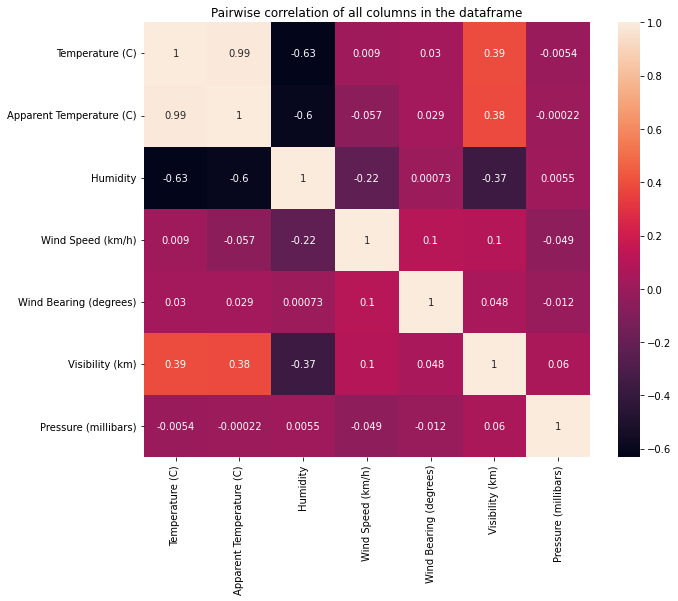

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data= data.corr(), annot=True)
plt.title("Pairwise correlation of all columns in the dataframe")
# save the figure
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')
plt.show()

### Changing Formatted Date from String to Datetime

In [9]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  int64              
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
dtypes: datetime64[n

### Number of Distinct Observation 

In [11]:
data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [12]:
data = data.set_index("Formatted Date")
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


* Now, we have hourly data, we need to resample it to monthly. 
* Resampling is a convenient method for frequency conversion.Object must have a datetime like index

### By Resampling, Create new DataFrame only for Apparent Temperature and Humidity 

In [13]:
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = data[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


"MS" denotes Month starting.We are displaying the average apparent temperature and humidity using mean() function.

# Exploratory Data Analysis

Given:

The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming".

The Alternative Hypothesis H1 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data not indicate an increase due to Global warming".

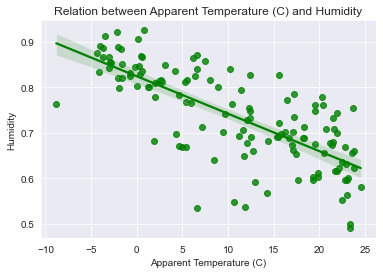

In [14]:
sns.set_style("darkgrid")
sns.regplot(data=df_monthly_mean, x="Apparent Temperature (C)", y="Humidity", color="g")
plt.title("Relation between Apparent Temperature (C) and Humidity")
# save the figure
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

Observation:
There might be Linear Relationship between "Apparent Temperature (C)" and "Humidity" with negative slope.

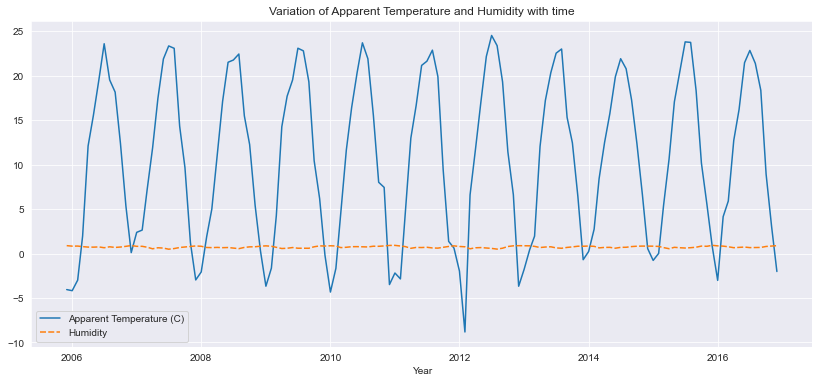

In [15]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean)
plt.xlabel('Year')
plt.title("Variation of Apparent Temperature and Humidity with time")
# save the figure
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()

#### Observation:
From the above plot,
1. "Humidity" remained constant from 2006 - 2016
2. "Apparent Temperature (C)" frequently changed from 2006 - 2016

### Pair plot for correlation of Apparent temperature & Humidity

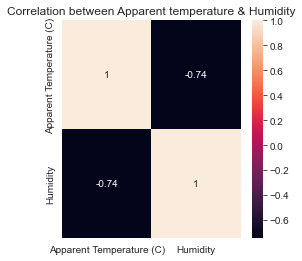

In [16]:
# Pair plot for correlation of Apparent temperature & Humidity
sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.title("Correlation between Apparent temperature & Humidity")
sns.heatmap(data= df_monthly_mean.corr(), annot=True)
# save the figure
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()

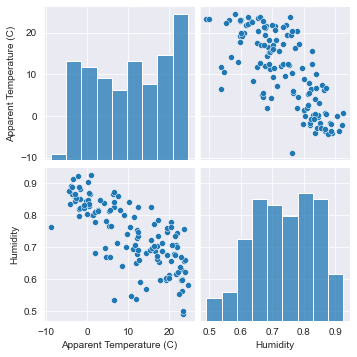

In [17]:
sns.pairplot(df_monthly_mean, kind='scatter')
# save the figure
plt.savefig('plot8.png', dpi=300, bbox_inches='tight')
plt.show()

### 2D Scatter Plot with Color Coding for each Summary type

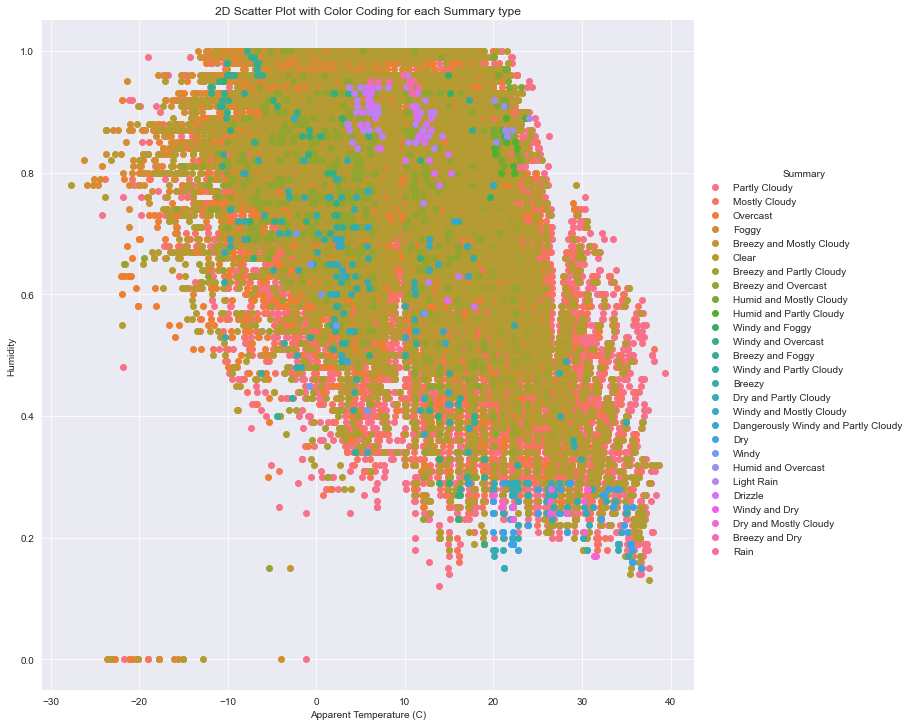

In [18]:
sns.set_style("darkgrid")
db_scatter_plt=pd.read_csv('weatherHistory.csv')
sns.FacetGrid(db_scatter_plt, hue="Summary", height=10).map(plt.scatter, "Apparent Temperature (C)", "Humidity").add_legend()
plt.title("2D Scatter Plot with Color Coding for each Summary type")
# save the figure
plt.savefig('plot3.png', dpi=400, bbox_inches='tight')
plt.show()

Observation:
1. There are very few outlier.
2. Mostly Weather is Clear or Partly Cloudy/Rain in Finland.
3. Only few days there has a Light Rain or Dry or Dangerously Windy and Partly Cloudy.

### Univariate Analysis

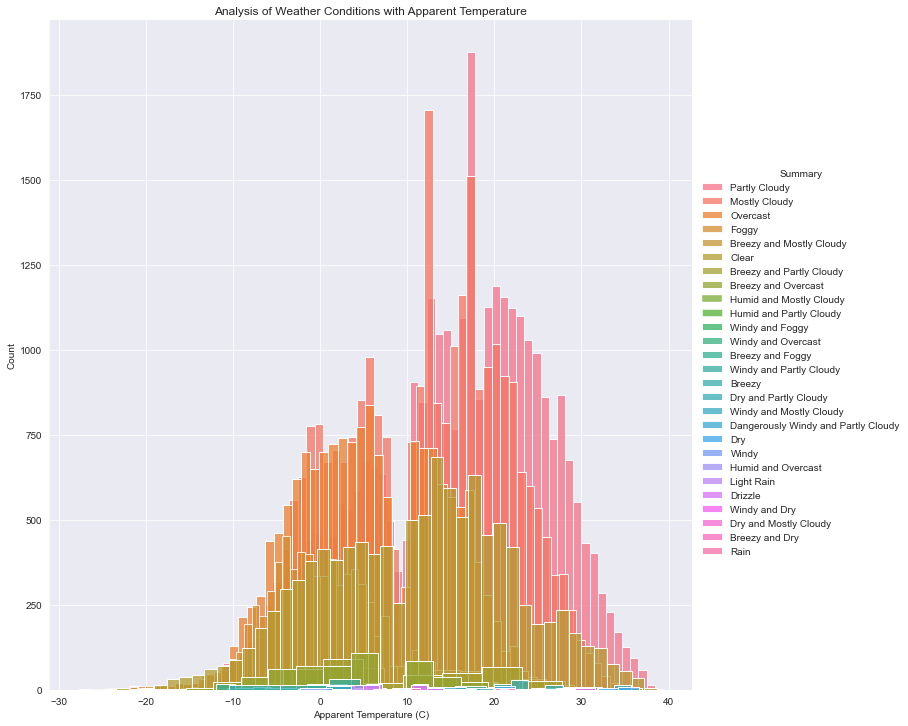

In [19]:
# For Apparent Temperature (C)
sns.set_style("darkgrid")
db_uni_plt_temp = pd.read_csv('weatherHistory.csv')
sns.FacetGrid(db_uni_plt_temp, hue="Summary", height=10).map(sns.histplot, "Apparent Temperature (C)").add_legend()
plt.title("Analysis of Weather Conditions with Apparent Temperature")
# save the figure
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
plt.show()

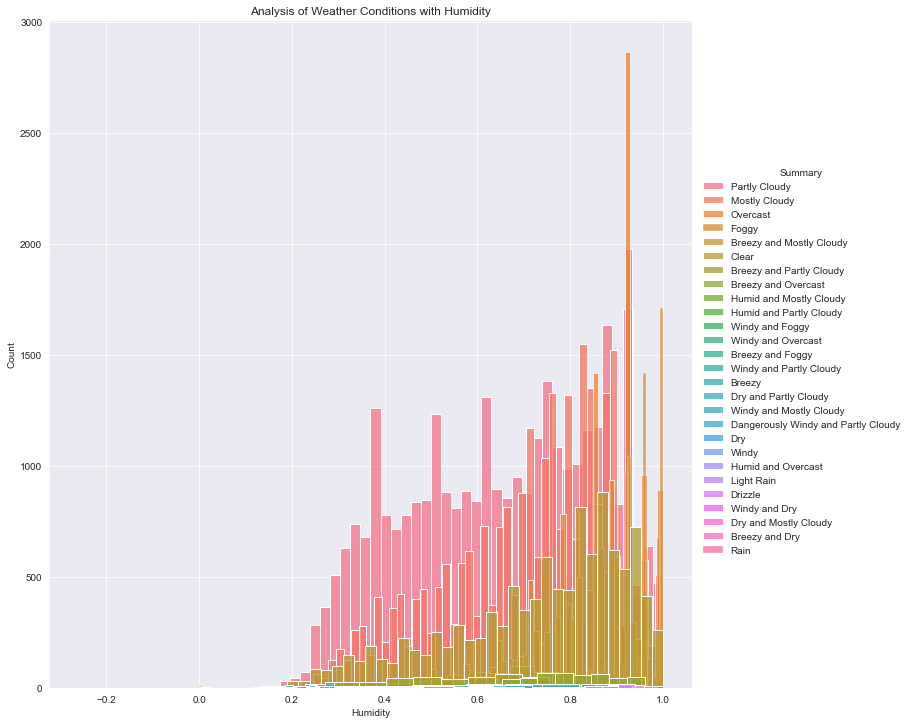

In [20]:
# For Humidity
data=pd.read_csv('weatherHistory.csv')
db_uni_plt_hmdt=pd.read_csv('weatherHistory.csv')
sns.set_style("darkgrid")
sns.FacetGrid(db_uni_plt_hmdt, hue="Summary",height=10).map(sns.histplot, "Humidity").add_legend()
plt.title("Analysis of Weather Conditions with Humidity")
# save the figure
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')
plt.show()

Observation:
"Humidity" is better Feature than "Apparent Temperature (C)"

### Function for plotting Humidity & Apparent Temperature for all months

In [21]:
# Function for plotting Humidity & Apparent Temperature for all month
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.savefig('plot10.png', dpi=300, bbox_inches='tight') 
    #plt.savefig('plot11.png', dpi=300, bbox_inches='tight')  
    plt.show()

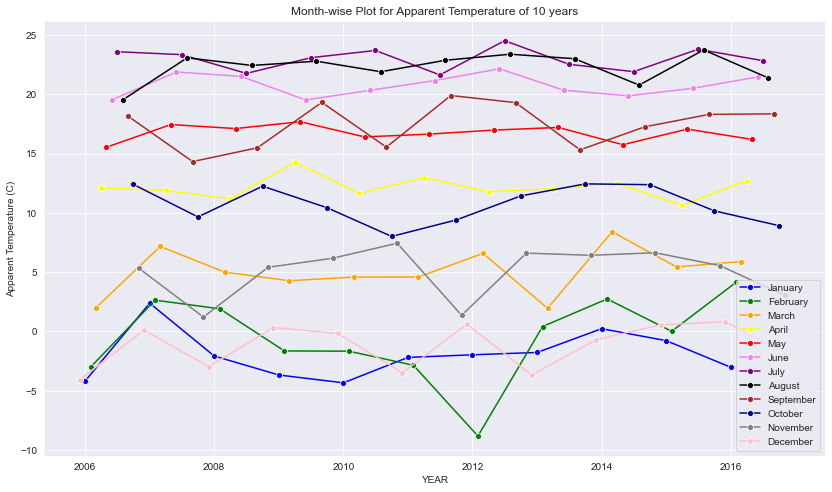

In [22]:
# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, TEMP_DATA)

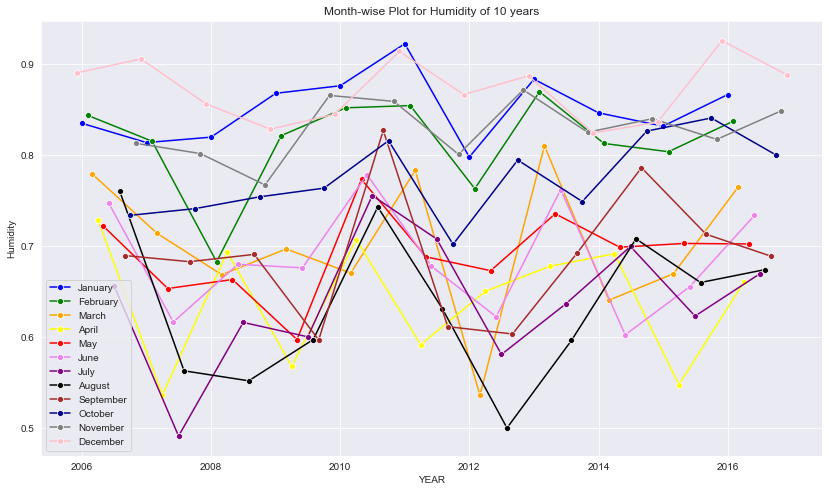

In [23]:
# Month-wise Plot for Humidity of 10 years 
title = 'Month-wise Plot for Humidity of 10 years' 
sns_plot(title, HUM_DATA)

In [24]:
# Function for plotting Apparent Temperature & Humidity for each month
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature Vs Humidity for {}'.format(label))
    plt.xlabel('YEAR')
    data = df_monthly_mean[df_monthly_mean.index.month == month]
    sns.lineplot(data=data, marker='o')
    name="month"+str(month)+".png"
    plt.savefig(name, dpi=300, bbox_inches='tight')  
    plt.show()
    print('-'*80)

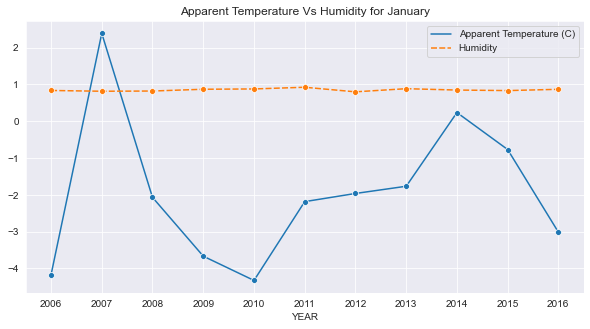

--------------------------------------------------------------------------------


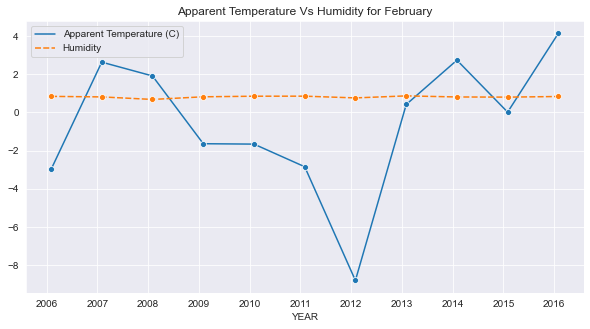

--------------------------------------------------------------------------------


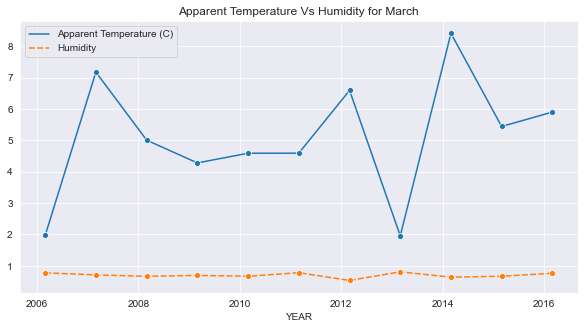

--------------------------------------------------------------------------------


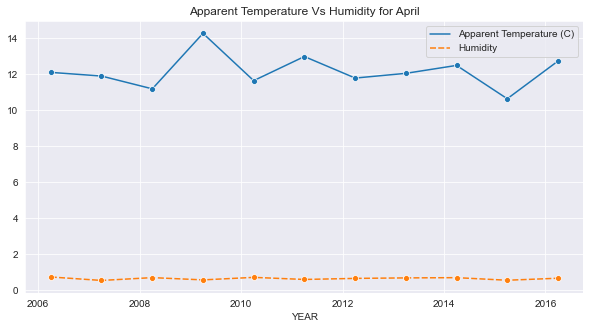

--------------------------------------------------------------------------------


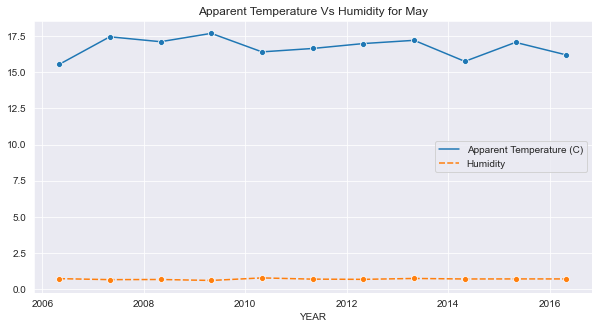

--------------------------------------------------------------------------------


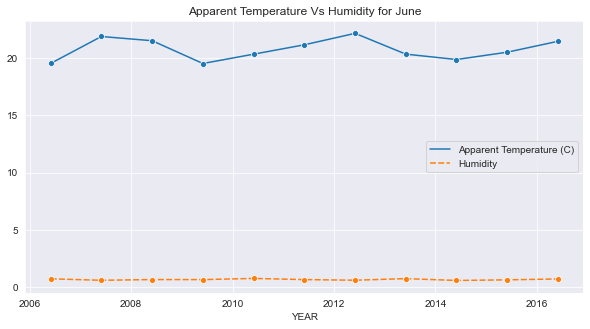

--------------------------------------------------------------------------------


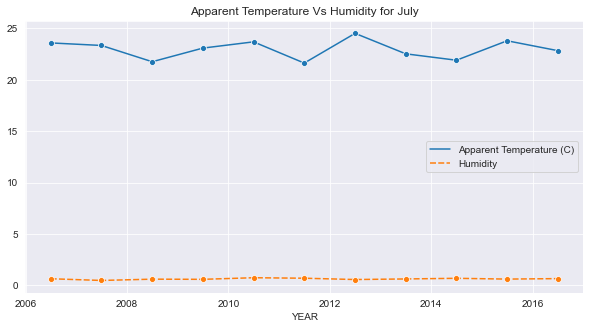

--------------------------------------------------------------------------------


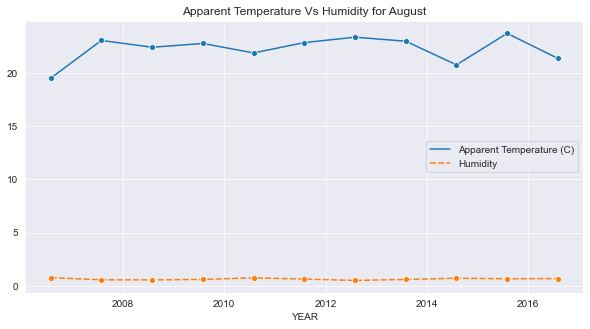

--------------------------------------------------------------------------------


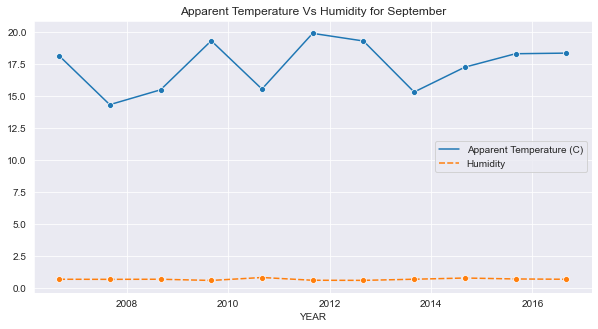

--------------------------------------------------------------------------------


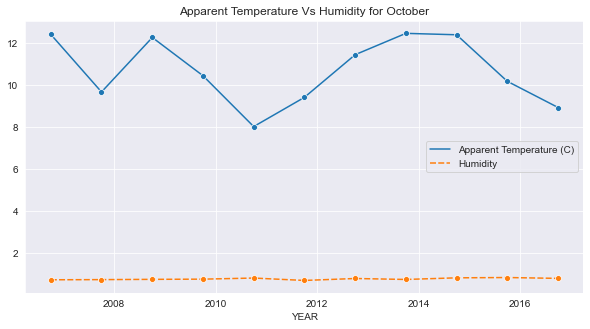

--------------------------------------------------------------------------------


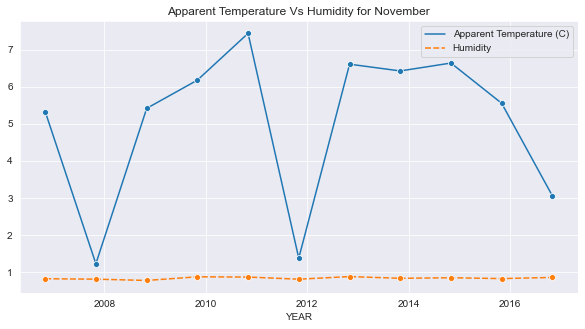

--------------------------------------------------------------------------------


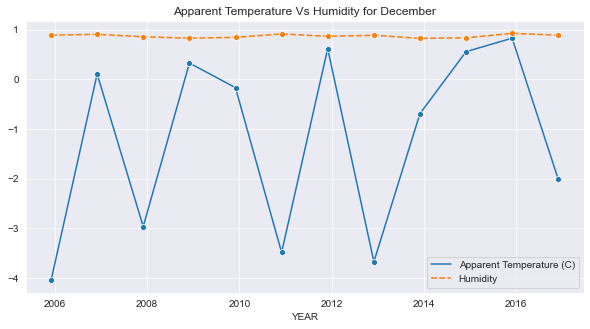

--------------------------------------------------------------------------------


In [25]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)

Conclusion:

As we can see in the above images, there are many ups and downs in the temperature and the average humidity has remained constant throughout the 10 years.So, We can conclude that global warming has caused an uncertainty in the temperature over the past 10 years.